<a href="https://colab.research.google.com/github/ShahzebFarruk/ELG5902_Text_Cateorization/blob/main/Text_Categorization_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload=files.upload()

Saving mtsamples.csv to mtsamples.csv


In [ ]:
!pip install transformers

     |████████████████████████████████| 2.0MB 18.0MB/s 
     |████████████████████████████████| 890kB 49.9MB/s 
     |████████████████████████████████| 3.2MB 51.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=98bee9b068550cb5695a681c4de86a87aef750e7a7755bd63b25a6f781c69cb5
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import pandas as pd
df = pd.read_csv("mtsamples.csv")
df=df.drop("m",axis=1)
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
df['medical_specialty'].value_counts()

 Surgery                          1103
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        372
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  230
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Obstetrics / Gynecology           160
 Urology                           158
 Discharge Summary                 108
 ENT - Otolaryngology               98
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    62
 Psychiatry / Psychology            53
 Office Notes                       51
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

In [ ]:
df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)

In [ ]:
data_categories  = df.groupby(df['medical_specialty'])
i = 1
print('===========Original Categories =======================')
for catName,dataCategory in data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('==================================')

===========Original Categories =======================
Cat:1  Allergy / Immunology : 3
Cat:2  Bariatrics : 18
Cat:3  Cardiovascular / Pulmonary : 280
Cat:4  Chiropractic : 4
Cat:5  Consult - History and Phy. : 234
Cat:6  Cosmetic / Plastic Surgery : 25
Cat:7  Dentistry : 25
Cat:8  Dermatology : 25
Cat:9  Diets and Nutritions : 10
Cat:10  Discharge Summary : 77
Cat:11  ENT - Otolaryngology : 84
Cat:12  Emergency Room Reports : 31
Cat:13  Endocrinology : 15
Cat:14  Gastroenterology : 195
Cat:15  General Medicine : 146
Cat:16  Hematology - Oncology : 62
Cat:17  Hospice - Palliative Care : 5
Cat:18  IME-QME-Work Comp etc. : 4
Cat:19  Lab Medicine - Pathology : 8
Cat:20  Letters : 20
Cat:21  Nephrology : 63
Cat:22  Neurology : 168
Cat:23  Neurosurgery : 81
Cat:24  Obstetrics / Gynecology : 130
Cat:25  Office Notes : 44
Cat:26  Ophthalmology : 79
Cat:27  Orthopedic : 303
Cat:28  Pain Management : 58
Cat:29  Pediatrics - Neonatal : 42
Cat:30  Physical Medicine - Rehab : 11
Cat:31  Podiatry : 

In [ ]:
filtered_data_categories = data_categories.filter(lambda x:x.shape[0] > 200)
final_data_categories = filtered_data_categories.groupby(filtered_data_categories['medical_specialty'])
i=1
print('============Reduced Categories ======================')
for catName,dataCategory in final_data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1

print('============ Reduced Categories ======================')

============Reduced Categories ======================
Cat:1  Cardiovascular / Pulmonary : 280
Cat:2  Consult - History and Phy. : 234
Cat:3  Orthopedic : 303
Cat:4  Radiology : 251
Cat:5  Surgery : 1021
============ Reduced Categories ======================


In [ ]:
filtered_data_categories

,description,medical_specialty,sample_name,transcription,keywords
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram..."
9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,..."
11,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,2-D Doppler,"2-D STUDY,1. Mild aortic stenosis, widely calc...","cardiovascular / pulmonary, 2-d study, doppler..."
...,...,...,...,...,...
4967,"Left heart cath, selective coronary angiogram...",Cardiovascular / Pulmonary,Angiogram & StarClose Closure,"EXAM: , Left heart cath, selective coronary an...","cardiovascular / pulmonary, heart cath, select..."
4968,Selective coronary angiography of the right c...,Cardiovascular / Pulmonary,Angiography & Catheterization - 1,"INDICATION:, Acute coronary syndrome.,CONSENT...","cardiovascular / pulmonary, acute coronary syn..."
4971,A sample note on Angina.,Cardiovascular / Pulmonary,Angina,"ANGINA, is chest pain due to a lack of oxygen ...","cardiovascular / pulmonary, lack of oxygen, he..."
4972,Adenosine with nuclear scan as the patient un...,Cardiovascular / Pulmonary,Adenosine Nuclear Scan,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...","cardiovascular / pulmonary, adenosine nuclear ..."


In [ ]:
data = filtered_data_categories[['transcription', 'medical_specialty']]
data = data.drop(data[data['transcription'].isna()].index)
data.shape

(2089, 2)

In [ ]:
data

,transcription,medical_specialty
3,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary
4,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary
7,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary
9,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary
11,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary
...,...,...
4967,"EXAM: , Left heart cath, selective coronary an...",Cardiovascular / Pulmonary
4968,"INDICATION:, Acute coronary syndrome.,CONSENT...",Cardiovascular / Pulmonary
4971,"ANGINA, is chest pain due to a lack of oxygen ...",Cardiovascular / Pulmonary
4972,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary


In [ ]:
import torch
from tqdm.notebook import tqdm
import pandas as pd

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
data['medical_specialty'].value_counts()

 Surgery                       1021
 Orthopedic                     303
 Cardiovascular / Pulmonary     280
 Radiology                      251
 Consult - History and Phy.     234
Name: medical_specialty, dtype: int64

In [ ]:
possible_labels = data.medical_specialty.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{' Cardiovascular / Pulmonary': 0,
 ' Consult - History and Phy.': 4,
 ' Orthopedic': 3,
 ' Radiology': 2,
 ' Surgery': 1}

In [ ]:
data['label'] = data.medical_specialty.replace(label_dict)

In [ ]:
data

,transcription,medical_specialty,label
3,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary,0
4,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary,0
7,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary,0
9,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary,0
11,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary,0
...,...,...,...
4967,"EXAM: , Left heart cath, selective coronary an...",Cardiovascular / Pulmonary,0
4968,"INDICATION:, Acute coronary syndrome.,CONSENT...",Cardiovascular / Pulmonary,0
4971,"ANGINA, is chest pain due to a lack of oxygen ...",Cardiovascular / Pulmonary,0
4972,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary,0


In [ ]:
data

,transcription,medical_specialty,label
3,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary,0
4,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary,0
7,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary,0
9,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary,0
11,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary,0
...,...,...,...
4967,"EXAM: , Left heart cath, selective coronary an...",Cardiovascular / Pulmonary,0
4968,"INDICATION:, Acute coronary syndrome.,CONSENT...",Cardiovascular / Pulmonary,0
4971,"ANGINA, is chest pain due to a lack of oxygen ...",Cardiovascular / Pulmonary,0
4972,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary,0


In [ ]:
df

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4984,Patient suffered from morbid obesity for many...,Bariatrics,Discharge Summary - Gastric Bypass,"ADMISSION DIAGNOSIS:, Morbid obesity. BMI is...","bariatrics, laparoscopic gastric bypass, gastr..."
4985,Patient presented to the Bariatric Surgery Se...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 4,"HISTORY OF PRESENT ILLNESS:, Ms. A is a 55-ye...","bariatrics, jenny craig, medifast, nutrisystem..."
4989,Evaluation for elective surgical weight loss ...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 2,"PAST MEDICAL HISTORY: ,She had a negative str...","bariatrics, elective surgical weight loss, sur..."
4993,"Chronic glossitis, xerostomia, probable envir...",Allergy / Immunology,Evaluation of Allergies,"HISTORY:, A 55-year-old female presents self-...","allergy / immunology, chronic glossitis, xeros..."


In [ ]:
df=data

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                  df.label.values, 
                                                  test_size=0.33, 
                                                  random_state=42, 
                                                  stratify=df.label.values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

df.groupby(['medical_specialty', 'label', 'data_type']).count()

transcription
medical_specialty           label data_type               
 Cardiovascular / Pulmonary 0     train                187
                                  val                   93
 Consult - History and Phy. 4     train                157
                                  val                   77
 Orthopedic                 3     train                203
                                  val                  100
 Radiology                  2     train                168
                                  val                   83
 Surgery                    1     train                684
                                  val                  337

In [ ]:
#df=df.drop(['medical_specialty','sample_name','keywords','description'], axis=1)

In [ ]:
df

,transcription,medical_specialty,label,data_type
3,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary,0,train
4,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary,0,val
7,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary,0,train
9,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary,0,val
11,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary,0,train
...,...,...,...,...
4967,"EXAM: , Left heart cath, selective coronary an...",Cardiovascular / Pulmonary,0,train
4968,"INDICATION:, Acute coronary syndrome.,CONSENT...",Cardiovascular / Pulmonary,0,train
4971,"ANGINA, is chest pain due to a lack of oxygen ...",Cardiovascular / Pulmonary,0,train
4972,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary,0,train


In [ ]:

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].transcription.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].transcription.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2074: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
encoded_data_train

{'input_ids': tensor([[  101,  1016,  1011,  ...,     0,     0,     0],
        [  101,  1016,  1011,  ...,     0,     0,     0],
        [  101,  1016,  1011,  ...,     0,     0,     0],
        ...,
        [  101, 12407,  1024,  ...,  3081,  6310,   102],
        [  101, 17076,  3981,  ...,  8999,  2030,   102],
        [  101, 12407,  1024,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
torch.set_printoptions(edgeitems=1)

In [ ]:
input_ids_train.size()

torch.Size([1399, 256])

In [ ]:
attention_masks_train.size()

torch.Size([1399, 256])

In [ ]:
labels_train.size()

torch.Size([1399])

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:

from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    w=[0,0,0,0,0]
    i=0

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}')
        q=len(y_preds[y_preds==label])
        e=len(y_true)
        w[i]=w[i]+q/e
        i=i+1
        print('Accuracy in % = '+ str(w[i-1]*100) + '%')
        print('\n')
    return w

In [ ]:
#device='cpu'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).



Epoch 1
Training loss: 1.0740681969315389
Validation loss: 0.8259856034880099
F1 Score (Weighted): 0.6042561111152766



Epoch 2
Training loss: 0.749328688497015
Validation loss: 0.6686681499785703
F1 Score (Weighted): 0.6695537134239885



Epoch 3
Training loss: 0.608178681169479
Validation loss: 0.6763115630768564
F1 Score (Weighted): 0.6314305857736059



Epoch 4
Training loss: 0.5379922295735085
Validation loss: 0.8004258471500615
F1 Score (Weighted): 0.6235248630574975



Epoch 5
Training loss: 0.48448047634389657
Validation loss: 0.7634101423313436
F1 Score (Weighted): 0.6325038656653138



"\n# corresponding y axis values \ny = [2,4,1] \nplt.plot(x, y) \n# naming the x axis \nplt.xlabel('x - axis') \n# naming the y axis \nplt.ylabel('y - axis') \n      \n# giving a title to my graph \nplt.title('My first graph!') \n\n# function to show the plot \nplt.show() "

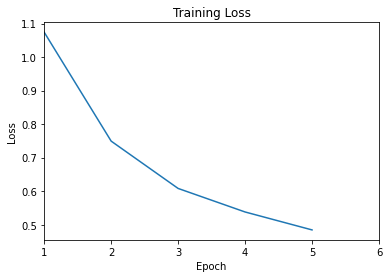

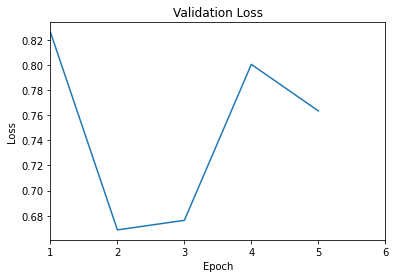

In [ ]:
import numpy as np
from tqdm.notebook import tqdm
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
device = "cuda:0"
model = model.to(device)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

from google.colab import drive
drive.mount('/content/gdrive')
train_loss_list=[]
epoch_list=[]
val_loss_list=[]

for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
    model_save_name = 'classifier.pt'
    path = F"/content/gdrive/My Drive/{model_save_name}" 
    torch.save(model.state_dict(), path)

    #torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    import matplotlib.pyplot as plt 
    train_loss_list.append(loss_train_avg) 
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    val_loss_list.append(val_loss)
    epoch_list.append(epoch) 


    if epoch==5:
      plt.xlabel('Epoch') 
      plt.ylabel('Loss') 
      plt.title('Training Loss')
      plt.xlim(1,6)
      plot1 = plt.figure(1)
      plt.plot(epoch_list, train_loss_list ,label = "Training Loss")
      plot2 = plt.figure(2) 
      plt.xlabel('Epoch') 
      plt.ylabel('Loss') 
  
      plt.title('Validation Loss')
      plt.plot(epoch_list, val_loss_list ,label = "Validation Loss")
      plt.xlim(1,6)


'''
# corresponding y axis values 
y = [2,4,1] 
plt.plot(x, y) 
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
      
# giving a title to my graph 
plt.title('My first graph!') 

# function to show the plot 
plt.show() '''

In [ ]:
plt.title('Training and Validation Loss')
plt.xlim(1,6)
plt.plot(epoch_list, train_loss_list ,label = "Training Loss")
plt.plot(epoch_list, val_loss_list ,label = "Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show

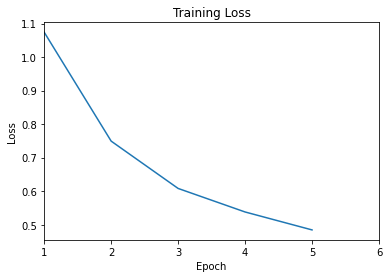

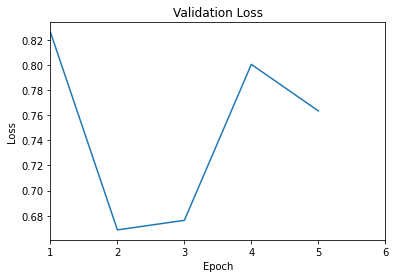

In [ ]:
if epoch==5:
      plt.xlabel('Epoch') 
      # naming the y axis 
      plt.ylabel('Loss') 
  
      # giving a title to my graph 
      plt.title('Training Loss')
      plt.xlim(1,6)
      plot1 = plt.figure(1)
      plt.plot(epoch_list, train_loss_list ,label = "Training Loss")
      #if epoch>2:
      #  plt.show()
      #plt.xlim(1,6)
      plot2 = plt.figure(2) 
      plt.xlabel('Epoch') 
      plt.ylabel('Loss') 
  
      plt.title('Validation Loss')
      plt.plot(epoch_list, val_loss_list ,label = "Validation Loss")
      plt.xlim(1,6)

In [ ]:
model_save_name = 'classifier.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)
model.load_state_dict(torch.load(path))
#model.load_state_dict(torch.load('data_volume/finetuned_BERT_epoch_1.model', map_location=torch.device('cpu')))

_, predictions, true_vals = evaluate(dataloader_validation)
Accuracy_score=accuracy_per_class(predictions, true_vals)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Class:  Cardiovascular / Pulmonary
Accuracy: 45/93
Accuracy in % = 48.38709677419355%


Class:  Surgery
Accuracy: 256/337
Accuracy in % = 75.96439169139467%


Class:  Radiology
Accuracy: 50/83
Accuracy in % = 60.24096385542169%


Class:  Orthopedic
Accuracy: 26/100
Accuracy in % = 26.0%


Class:  Consult - History and Phy.
Accuracy: 61/77
Accuracy in % = 79.22077922077922%




In [ ]:
average_accuracy=0
for i in Accuracy_score:
  average_accuracy=average_accuracy+i
print('The average Accuracy Score for the Multi-Class Text Categorization for our BERT Model is '+ str(round(average_accuracy*100/5,2)) +' %')

The average Accuracy Score for the Multi-Class Text Categorization for our BERT Model is 57.96 %
